# K Means Clustering Basics (Without ML Library)

K Means clustering falls under unsupervised Machine Learning category of algorithms, in which no labels are associated with data yet you have to obtain insight from it. Cluster means the collection of the datapoints who have similarities in some aspects or accoding to some features and K is the number of clusters. So basically we have to make K clusters according to features from the data. To run this algorithm you should have the value of K and data. Here we will consider data shown as,

    screen_size,RAM,model
    4.7,2,IPHONE6S
    5.5,2,IPHONE6S+
    5.1,4,SGS7
    6.41,8,OP6T
    13,8,MBAir
    15.6,4,Dell15
    11.6,2,IBallCompbook
    13.5,8,MicrosoftSurface

Above shown data is in the comma separated file Laptop_mobile_data.csv which contains the screen sizes and ammount of RAM that is available in the device. Based on which we will cluster them into two groups one is Laptop and other one is mobile. Our algorithm has to run on this data with the value of K=2 and should correctly cluster the data into 2 clusters.

But First lets collect and plot our data from a csv file,

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

def plot_data(data,colour):
    for single_point in data:
        plt.scatter(single_point[0],single_point[1], color=colour)
def collect_data():
    data_laptop_mobile = pd.read_csv("Laptop_mobile_data.csv")
    screen_sizes = [row["screen_size"] for i, row in data_laptop_mobile.iterrows()]
    ram_sizes = [row["RAM"] for i, row in data_laptop_mobile.iterrows()]
    return zip(ram_sizes,screen_sizes)
laptop_mobile_data = collect_data()
plot_data(list(laptop_mobile_data),colour="k")

We know beforehand that those top 4 dots are laptops and below 4 are mobiles because of the screen sizes, laptops generally have greater screen sizes than mobiles. But our algorithm does not know that and we dont have the labes saying that this is the laptop data and this is the mobile data. So our algorithm has to learn it. But first let us discuss the concept of the distance between two points, consider the two points (1,1) and (2,2) as shown below,

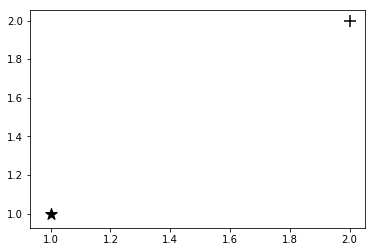

In [2]:
plt.scatter(1,1, marker="*",s=150,color="k" )
plt.scatter(2,2, marker="+",s=150,color="k" )

For finding the distance you just have to subtract X coordinate of both points, square it add it into square of subtraction of Y coordinates and take the square root you will get the distance. as given by the following formula,

distance = $\sqrt{(X_1-X_2)^2 + (Y_1-Y_2)^2}$

As the distance between two points increases the similarity between them decreases i.e. the points are more similar if the distance between them is less and vice versa. There is one more thing that we need to discuss before starting the discussion of the actual algorithm and that is centroid. For understandig centroid lets consider that you want to speen a notebook on your index finger. So while spinning what is the point of contact between your finger and notebook ? that point is the centroid of the notebook which is also known as centre of mass. So here in our case the centroid is the centre of mass point of a cluster whos value is mean value of all the points in the clusters.

Now we are ready to discuss the K_means algorithm, following are the steps involved into K_Means algorithm,
1. Define the number of clusters i.e. value of the K (In our case the value of K is 2)
2. Initialize K number of centroids randomly for k clusters
3. Calculate the distance of all the points from k centroids
4. A point belongs to a cluster if the distance between its centroid and point is minimum comapared to same with other clusters centroid
5. After iterating through all the points decide new centroids as the mean of all the points in the cluster
6. repeat step 3,4 and 5 till centroids does not chage its cordinates that means we have found our optimal centroids.

Now coding time,

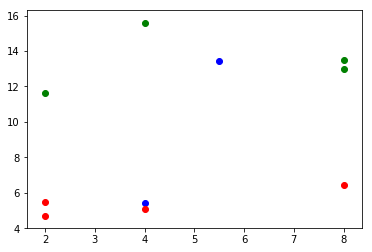

In [3]:
def calculate_euclidean_distance(point1,point2):
    return math.pow(math.pow(point1[0]-point2[0],2) + math.pow(point1[1]-point2[1],2),0.5)

def k_means_calculate_new_centroids(centroid1, centroid2, data,points_in_cluster1,points_in_cluster2):
    for single_point in data:
        ed1 = calculate_euclidean_distance(centroid1,single_point)
        ed2 = calculate_euclidean_distance(centroid2,single_point)
        if(ed1 < ed2):
            points_in_cluster1.append(single_point)
        else:
            points_in_cluster2.append(single_point)
    if(len(points_in_cluster1) > 0):
        centroid1[0] = sum([s1[0] for s1 in points_in_cluster1]) / len(points_in_cluster1)
        centroid1[1] = sum([s1[1] for s1 in points_in_cluster1]) / len(points_in_cluster1)
    if(len(points_in_cluster2) > 0):
        centroid2[0] = sum([s1[0] for s1 in points_in_cluster2]) / len(points_in_cluster2)
        centroid2[1] = sum([s1[1] for s1 in points_in_cluster2]) / len(points_in_cluster2)
    return data, centroid1, centroid2,points_in_cluster1,points_in_cluster2

def k_means_core_algo(centroid1, centroid2, data):
    for j in range(5):
        data,centroid1, centroid2, points_in_cluster1, points_in_cluster2 = k_means_calculate_new_centroids(centroid1, centroid2, list(data),[],[])
    return centroid1,centroid2, points_in_cluster1, points_in_cluster2
    
laptop_mobile_data = collect_data()

centroid1 = [1,1]
centroid2 = [2,2]

centroid1, centroid2,points_in_cluster1, points_in_cluster2 = k_means_core_algo(centroid1, centroid2, laptop_mobile_data)

plt.scatter(centroid1[0],centroid1[1],color="blue")
plt.scatter(centroid2[0],centroid2[1],color="blue")

plot_data(points_in_cluster1,colour="red")
plot_data(points_in_cluster2,colour="green")


The blue dots are the centroids of the 2 clusters. As we can see our program correctly identified the 2 clusters. The upper cluster is for laptops and below cluster is for mobiles. Now let us take look at what happens as each iteration gets completed. For that lets start from the initial position of the centroids which are drawn below in yellow colour in the following graph.

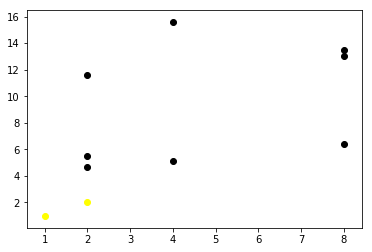

In [4]:
sample_data = collect_data()
plot_data(sample_data,colour="k")

plt.scatter(1,1,color="Yellow")
plt.scatter(2,2,color="Yellow")

As you can see initially our centroids were nowhere near expected centroids, so lets see the output after one iteration,

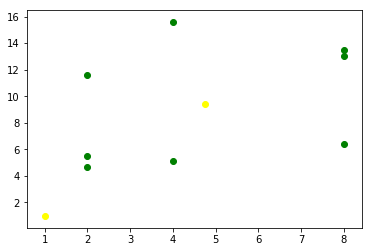

In [5]:

data_in_centroid2 = [(2, 4.7), (2, 5.5), (4, 5.1), (8, 6.41), (8, 13.0), (4, 15.6), (2, 11.6), (8, 13.5)]
plot_data(data_in_centroid2,colour="green")
plt.scatter(1,1,color="Yellow")
plt.scatter(4.75 ,9.42,color="Yellow")

As you can see after first iteration all the points were near to centroid 2 than centroid 1. So cluster 1 does not have any point and cluster 2 have all the points also after 1st iteration new centroid gets assigned as the mean of all the points in the cluster so new centroids become [1,1] and [4.75,9.42] as shown in above figure.  

Lets see the same output after 2nd iteration,

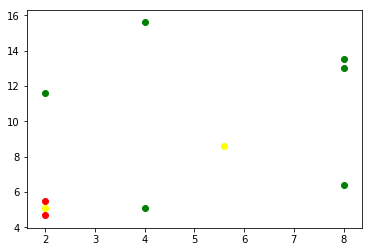

In [6]:
data_in_centroid1 = [(2, 4.7), (2, 5.5)]
data_in_centroid2 = [(4, 5.1), (8, 6.41), (8, 13.0), (4, 15.6), (2, 11.6), (8, 13.5)]
plot_data(data_in_centroid2,colour="green")
plot_data(data_in_centroid1,colour="red")
plt.scatter(2.0, 5.1,color="Yellow")
plt.scatter(5.6 ,8.6,color="Yellow")

As you see we got 2 points in cluster 1 as they are closer to centroid1 than centroid2. and our new centroid becomes [2,5.1],[5.6,8.6].

Now lets see the output after 3rd iteration,

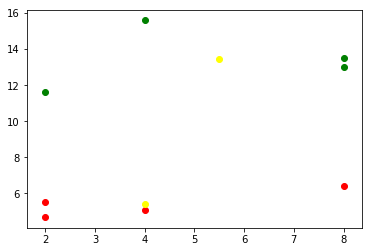

In [7]:
data_in_centroid1 = [(2, 4.7), (2, 5.5), (4, 5.1), (8, 6.41)]
data_in_centroid2 = [(8, 13.0), (4, 15.6), (2, 11.6), (8, 13.5)]
plot_data(data_in_centroid2,colour="green")
plot_data(data_in_centroid1,colour="red")
plt.scatter(4.0, 5.4275,color="Yellow")
plt.scatter(5.5, 13.425,color="Yellow")

As you can see after 3rd iteration we get our final output as expected. From here on our centroids does not change with the further iterations so now it is time to stop the calculations.

Here we have considered a very basic example about K means clustering to understand the basics of the algorithm. Further I would encourage you to see more examples <a href="https://github.com/llSourcell/k_means_clustering">here</a>